<a href="https://colab.research.google.com/github/Vishvashh/Acme-Co-Employee-Attrition-Analysis-and-Prediction/blob/main/Hr%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Load the data
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
print("Rows : " ,data.shape[0])

Rows :  1470


In [ ]:
print("Columns : " ,data.shape[1])

Columns :  35


In [ ]:
print("\nFeatures : \n" ,data.columns.tolist())



Features : 
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
print("\nUnique values : \n",data.nunique())


Unique values : 
 Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear   

In [ ]:
print("\nMissing values : ", data.isnull().sum().values.sum())


Missing values :  0


In [5]:
print(data.duplicated().value_counts())
data.drop_duplicates(inplace=True)
print(len(data))

False    1470
dtype: int64
1470


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


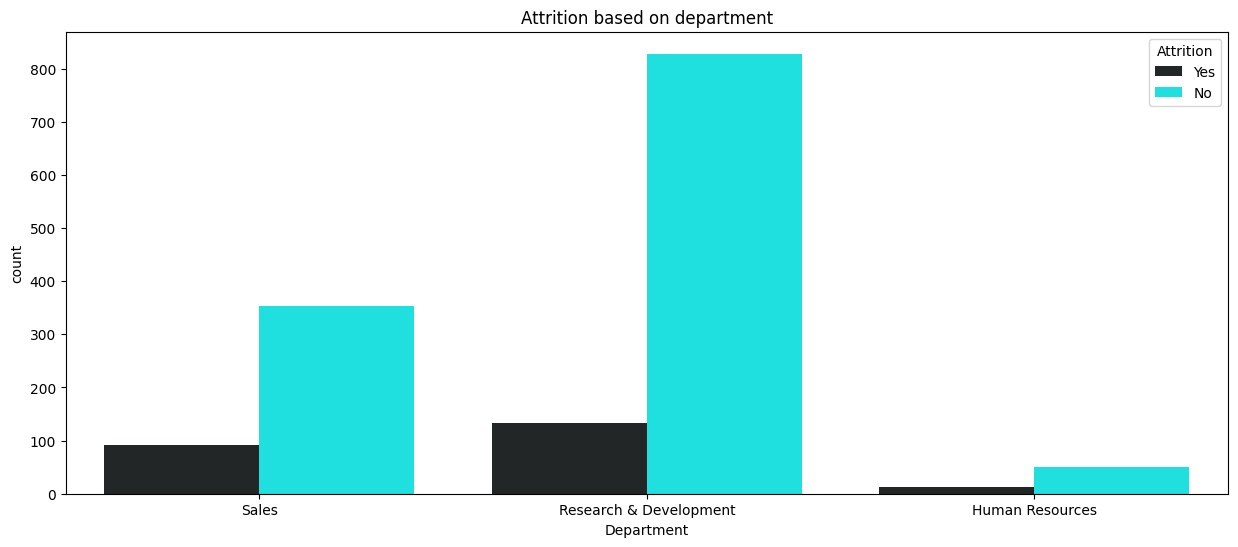

In [11]:
# Attrition rate across the  department

plt.figure(figsize=(15,6))
sns.countplot(x='Department', hue='Attrition', data=data, color='cyan')
plt.title("Attrition based on department")
plt.show()

In [13]:
#Age
age = pd.crosstab(data.Age,columns = data.Attrition)
age

Attrition,No,Yes
Age,,
18,4,4
19,3,6
20,5,6
21,7,6
22,11,5
23,10,4
24,19,7
25,20,6
26,27,12


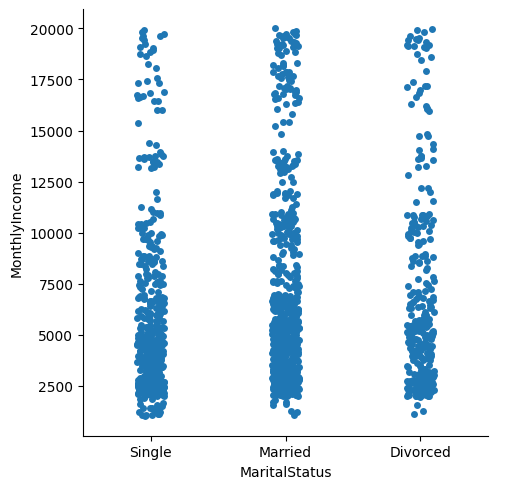

In [16]:
#Box plot of martial status,monthly income by attrition
sns.catplot(x="MaritalStatus",y="MonthlyIncome",data=data)
plt.show()

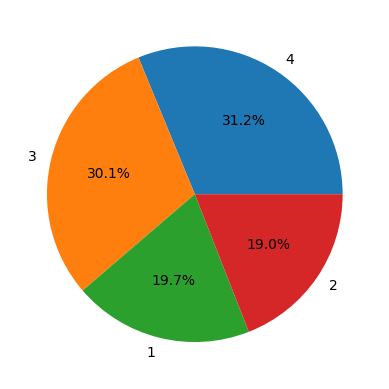

In [17]:
labels = ['4', '3','1','2']
plt.pie(data.JobSatisfaction.value_counts(), labels=labels, autopct='%.1f%%')
plt.show()

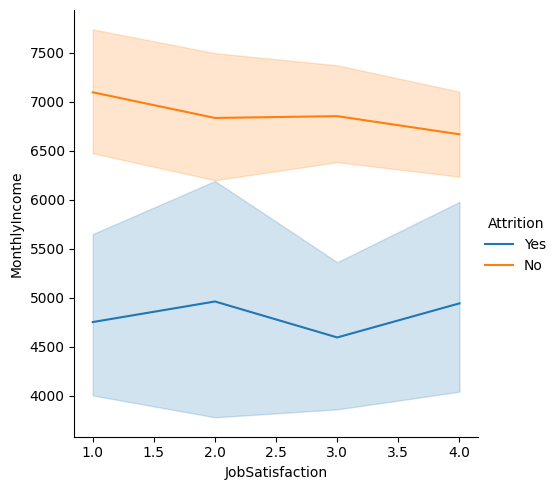

In [18]:
sns.relplot(x="JobSatisfaction",y="MonthlyIncome",hue="Attrition",kind="line",data=data)
plt.show()

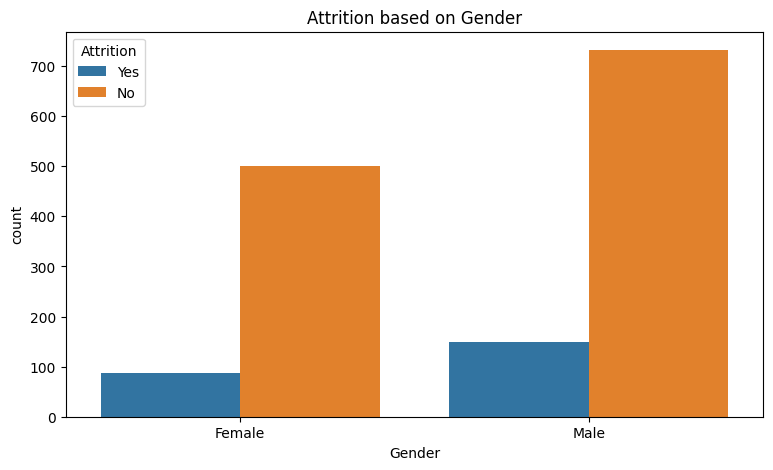

In [19]:
#Attrition rate across the  Gender

plt.figure(figsize=(9,5))
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title("Attrition based on Gender")
plt.show()

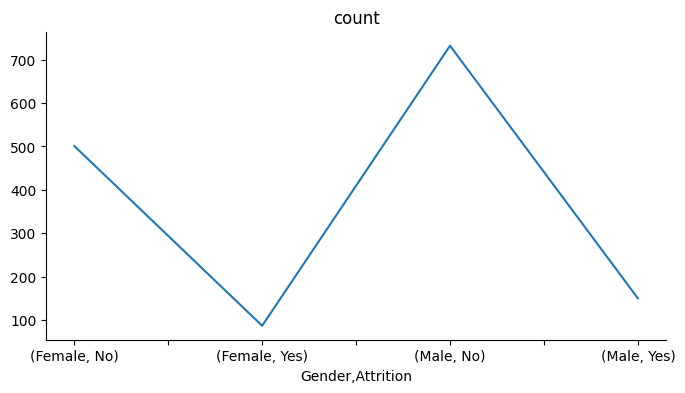

In [25]:
from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [26]:
data.groupby(["JobRole","Attrition"]).agg({"count":"sum"})

count
JobRole                   Attrition       
Healthcare Representative No           122
                          Yes            9
Human Resources           No            40
                          Yes           12
Laboratory Technician     No           197
                          Yes           62
Manager                   No            97
                          Yes            5
Manufacturing Director    No           135
                          Yes           10
Research Director         No            78
                          Yes            2
Research Scientist        No           245
                          Yes           47
Sales Executive           No           269
                          Yes           57
Sales Representative      No            50
                          Yes           33

from matplotlib import pyplot as plt
_df_9['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

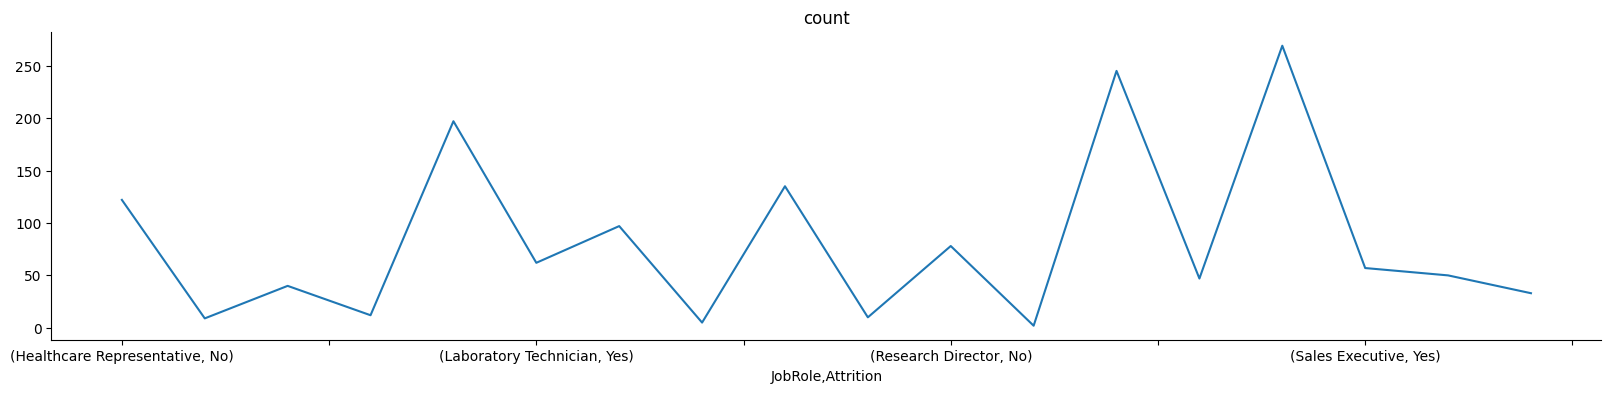

In [32]:
from matplotlib import pyplot as plt
_df_10['count'].plot(kind='line', figsize=(20, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [36]:
data.groupby(["EducationField"]).agg({"count":"sum"})

,count
EducationField,
Human Resources,27
Life Sciences,606
Marketing,159
Medical,464
Other,82
Technical Degree,132


In [37]:
#Environment Satisfaction

data["EnvironmentSatisfaction"].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

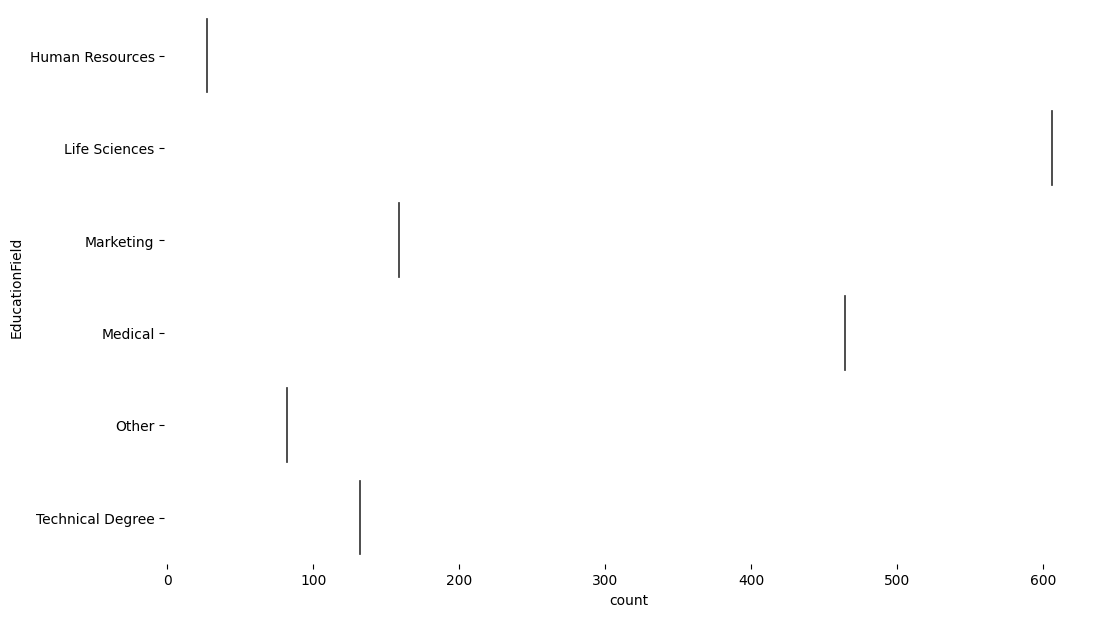

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['EducationField'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='count', y='EducationField', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [29]:
data.groupby(["Department","Attrition"]).agg({"count":"sum"})

count
Department             Attrition       
Human Resources        No            51
                       Yes           12
Research & Development No           828
                       Yes          133
Sales                  No           354
                       Yes           92

from matplotlib import pyplot as plt
_df_11['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

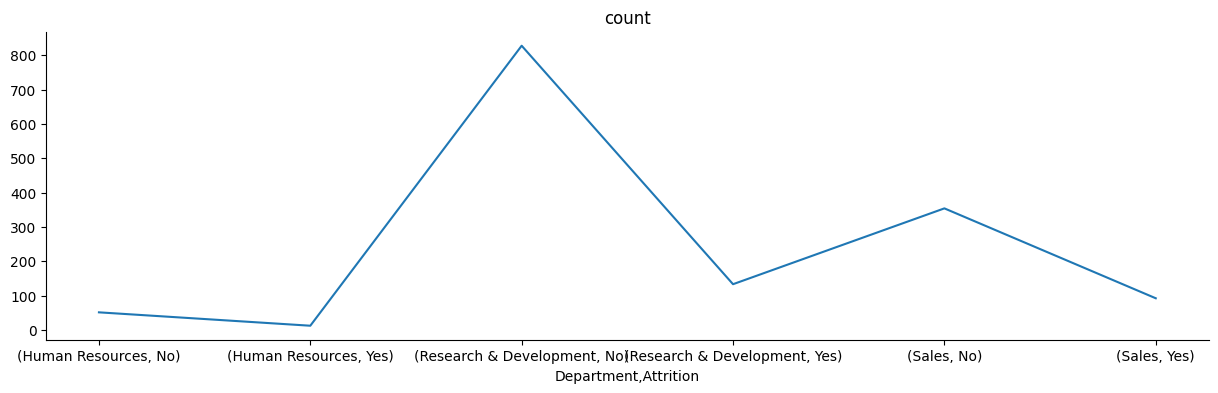

In [31]:
from matplotlib import pyplot as plt
_df_12['count'].plot(kind='line', figsize=(15, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)